<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_3_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

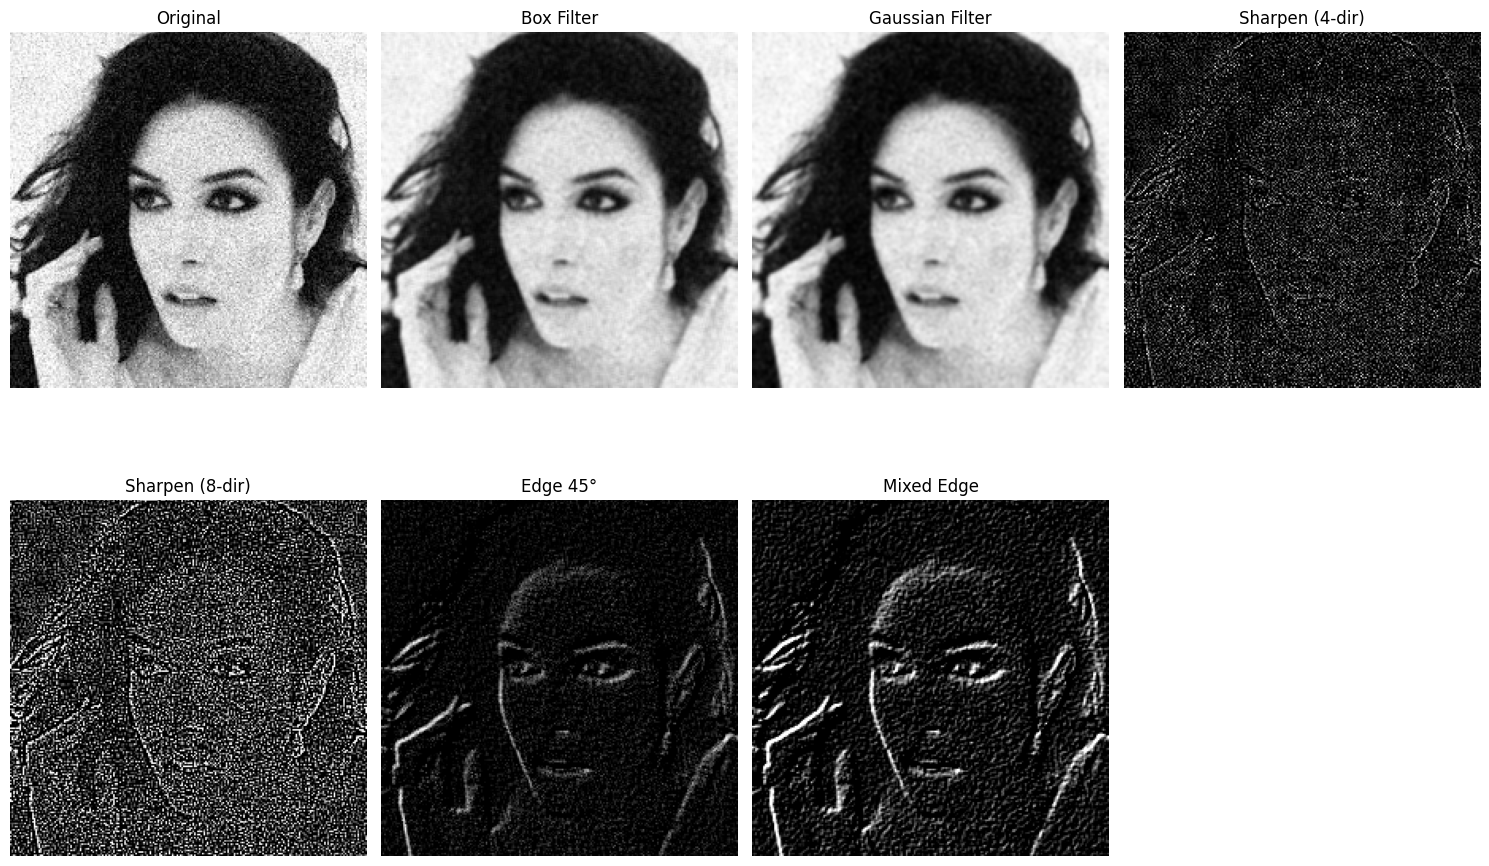

In [ ]:
import cv2  # 이미지 처리용 OpenCV 모듈
import numpy as np  # 배열 및 수치 계산을 위한 NumPy
import matplotlib.pyplot as plt  # 결과 시각화용 Matplotlib

# 이미지 URL에서 흑백 영상으로 변환하는 함수 정의
def fetch_grayscale_image(url):
    import urllib.request  # URL에서 데이터를 가져오기 위한 모듈
    with urllib.request.urlopen(url) as resp:
        img_data = np.asarray(bytearray(resp.read()), dtype=np.uint8)  # 이미지 데이터를 배열로 변환
    return cv2.imdecode(img_data, cv2.IMREAD_GRAYSCALE)  # 이미지를 흑백으로 디코딩하여 반환

# 원본 이미지 불러오기
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJhWn_wr0e2V-IdLgB6HNv6dTn3wAJvLkEwQ&s'
original_image = fetch_grayscale_image(image_url)  # 주어진 URL에서 흑백 이미지 불러오기

# 적용할 필터 목록 정의
filter_kernels = {
    "Box Filter": np.array([[1/9, 1/9, 1/9],  # 박스 필터 (평균 필터)
                            [1/9, 1/9, 1/9],
                            [1/9, 1/9, 1/9]]),

    "Gaussian Filter": np.array([[0.0030, 0.0133, 0.0219, 0.0133, 0.0030],  # 가우시안 필터 (블러 필터)
                                 [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
                                 [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
                                 [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
                                 [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]]),

    "Sharpen (4-dir)": np.array([[0, -1, 0],  # 4방향 샤프닝 필터 (엣지 강조)
                                 [-1, 4, -1],
                                 [0, -1, 0]]),

    "Sharpen (8-dir)": np.array([[-1, -1, -1],  # 8방향 샤프닝 필터 (엣지 강조)
                                 [-1, 8, -1],
                                 [-1, -1, -1]]),

    "Edge 45°": np.array([[-1, 0, 0],  # 45도 방향으로 엣지를 감지하는 필터
                          [0, 0, 0],
                          [0, 0, 1]]),

    "Mixed Edge": np.array([[-1, -1, 0],  # 혼합 엣지 감지 필터 (여러 방향을 결합함)
                            [-1, 0, 1],
                            [0, 1, 1]]),
}

# 각 필터를 적용한 결과 저장
filtered_outputs = {}
for name, kernel in filter_kernels.items():  # 각 필터에 대해
    result = cv2.filter2D(original_image, -1, kernel)  # 필터를 원본 이미지에 적용
    filtered_outputs[name] = result  # 결과 저장

# 시각적 비교를 위한 출력 구성
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(original_image, cmap='gray')  # 흑백 이미지로 표시
plt.title("Original")  # 제목 설정
plt.axis('off')  # 축 숨기기

# 각 필터 결과를 출력
for i, (name, img) in enumerate(filtered_outputs.items(), start=2):
    plt.subplot(2, 4, i)  # 각 필터 결과를 subplot에 배치
    plt.imshow(img, cmap='gray')  # 결과 이미지 흑백으로 표시
    plt.title(name)  # 필터 이름을 제목으로 표시
    plt.axis('off')  # 축 숨기기

plt.tight_layout()  # 출력 레이아웃 조정
plt.show()  # 결과 이미지 표시


# ### 결과 분석 ###
# 다양한 필터를 통해 흐릿한 이미지를 개선하고 각 필터가 어떻게 이미지의 특징을 바꾸는지 살펴봄.
#
# (a) Box Filter:
#     이 필터는 각 픽셀을 주변 값들과 평균화하여 이미지를 흐리게 만듦.
#     이 방식은 이미지를 부드럽게 만들지만 세부 정보가 많이 사라지게 되어 경계가 흐려지고 객체 구분이 어려워짐.
#     기본적인 흐림 효과를 제공하지만 과도하게 적용하면 중요한 정보가 소실됨.
#
# (b) Gaussian Filter:
#     가우시안 필터는 이미지의 흐림을 부드럽게 만들어주는 필터로 특히 이미지 내 노이즈를 제거하는 데 효과적임.
#     이 필터는 매우 부드러운 흐림을 주어 배경과 객체 간의 구분을 흐리게 만들지만 지나치게 흐리게 처리하면 세부 정보가 덮어지거나 중요 구조가 사라질 수 있음.
#
# (c) Sharpen (4-dir) & Sharpen (8-dir):
#     샤프닝 필터는 이미지를 더욱 뚜렷하게 만들어주는 필터로 특히 이미지 내 경계를 강조하여 구분이 쉽게 만들어줌.
#     4방향과 8방향 샤프닝 필터는 경계의 강조 정도에서 차이를 보이며 8방향 필터는 더욱 여러 각도에서 경계를 감지하여 객체를 더욱 선명하게 강조함.
#
# (d) Edge 45°:
#     이 필터는 특정 방향(45도)의 엣지를 강조하는데 그 방향에서 경계를 더욱 뚜렷하게 만들어줌.
#     특히 45도 방향의 구조적 특징을 강조하는 데 유용하여 특정 형태나 구조 분석에 유리함.
#
# (e) Mixed Edge:
#     여러 방향에서 엣지를 동시에 감지하는 이 필터는 복잡한 구조나 형태를 잘 드러냄.
#     다양한 방향에서의 경계를 강조하여 이미지에서 여러 특성을 동시에 추출할 수 있는 강력한 도구임.
#
# 각 필터는 이미지 처리에서 중요한 역할을 하며 필터의 선택은 이미지 처리 목적에 따라 달라질 수 있음.
# 박스 필터와 가우시안 필터는 부드러운 흐림과 노이즈 제거에 유리하고 샤프닝 필터와 엣지 필터는 이미지의 경계와 세부 구조를 강조하는 데 유용함.
# 각 필터의 특성을 잘 활용하면 이미지의 중요한 정보를 효과적으로 추출할 수 있음.